# Project Proposal (TITLE)

## Project Proposal (INTRODUCTION)

In [1]:
library(tidyverse)
library(infer)
library(repr)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
## Reading and tidying data from file ##
pokemon <- read_csv("https://raw.githubusercontent.com/Kooriryuu/Stat201Group2/main/Pokemon.csv")
colnames(pokemon) <- gsub(" ", "_", colnames(pokemon))
head(pokemon)

Rows: 800 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Name, Type 1, Type 2
dbl (9): #, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation
lgl (1): Legendary

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,Charmander,Fire,NA,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,NA,405,58,64,58,80,65,80,1,FALSE


In [3]:
## Wrangling Data (Removing legendaries and selecting relevant columns) ##
pokemon <- pokemon |>
    filter(!Legendary) |>
    select(Type_1, Type_2, Total:Speed)
head(pokemon)

Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Grass,Poison,318,45,49,49,65,65,45
Grass,Poison,405,60,62,63,80,80,60
Grass,Poison,525,80,82,83,100,100,80
Grass,Poison,625,80,100,123,122,120,80
Fire,NA,309,39,52,43,60,50,65
Fire,NA,405,58,64,58,80,65,80


In [4]:
## Calculating sample mean for Bug and Non-Bug pokemon (sample size = 30) ##
set.seed(6969)
bug_sample <- pokemon |>
    filter(Type_1 == "Bug" | Type_2 == "Bug") |>
    sample_n(size = 30)

non_bug_sample <- pokemon |>
    filter(Type_1 != "Bug" & Type_2 != "Bug") |>
    sample_n(size = 30)

sample_means = tibble(
    bug_power = mean(bug_sample$Total),
    non_bug_power = mean(non_bug_sample$Total))

combined_sample = rbind(bug_sample,non_bug_sample) |>
    mutate(isBug = Type_1 == "Bug" | Type_2 == "Bug" & (!is.na(Type_2)))
sample_means

bug_power,non_bug_power
<dbl>,<dbl>
376.3667,476.8667


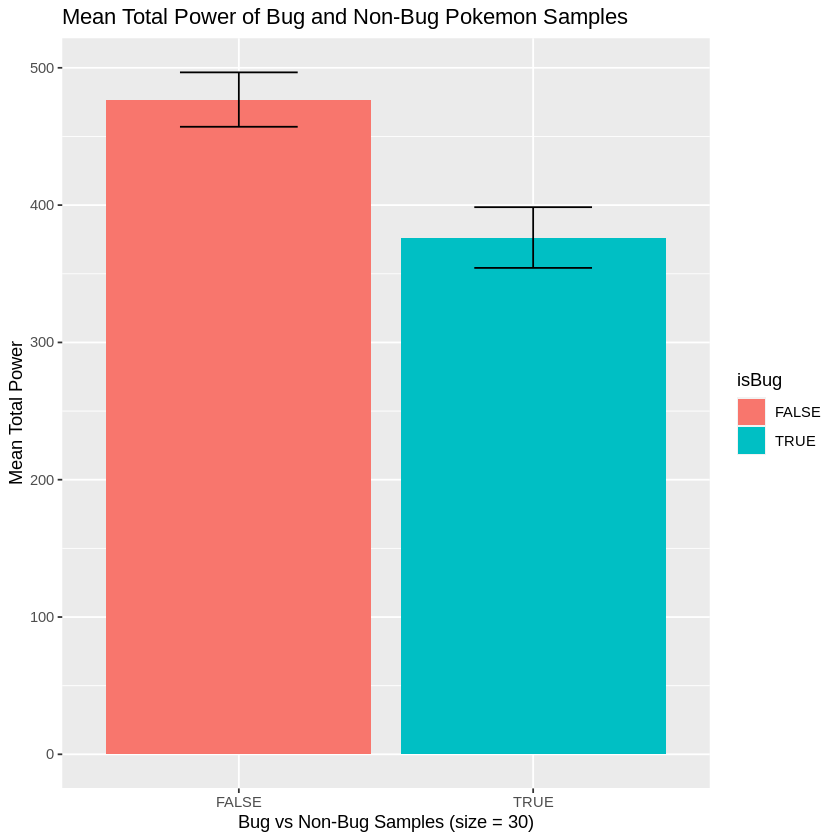

In [5]:
## Visualising difference in power ##
pokemon_plot <- combined_sample |>
    group_by(isBug) |>
    summarise(meanTotal = mean(Total),
             std_d = sd(Total) / sqrt(n())) |>
    ggplot() +
    geom_col(aes(x=isBug, y=meanTotal, fill = isBug)) +
    geom_errorbar(aes(x = isBug, ymin=meanTotal-std_d, ymax=meanTotal+std_d), width=0.4) +
    ggtitle("Mean Total Power of Bug and Non-Bug Pokemon Samples") +
    xlab("Bug vs Non-Bug Samples (size = 30)") +
    ylab("Mean Total Power")


## Quantititive Plot Relavence?? ##
pokemon_plot2 <- pokemon |>
    mutate(isBug = Type_1 == "Bug" | Type_2 == "Bug" & (!is.na(Type_2))) |>
    ggplot(aes(x=Defense, y = Total, colour = isBug)) +
    geom_point()

pokemon_plot
#pokemon_plot2

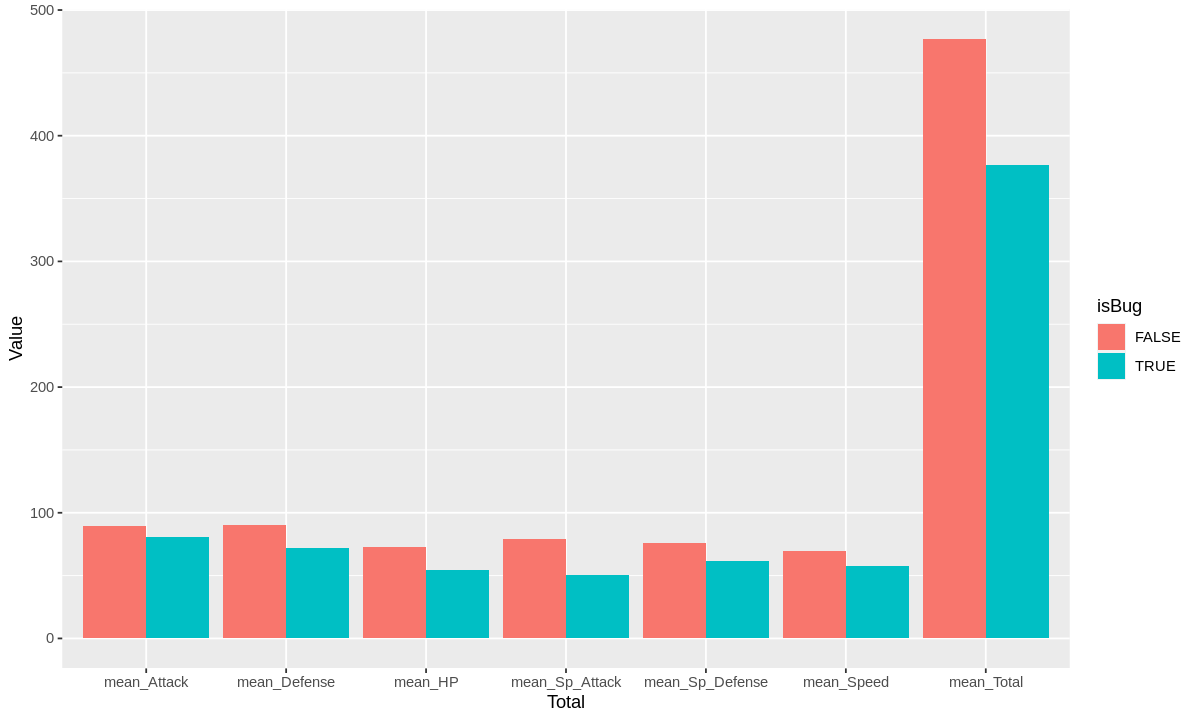

In [6]:
## Visualisation of bug pokemon vs non-bug pokemon in various stats ##
options(repr.plot.width = 10, repr.plot.height = 6)
bug_data <- bug_sample |>
    summarise(isBug = TRUE,
        mean_Total = mean(Total),
           mean_HP = mean(HP),
           mean_Attack = mean(Attack),
           mean_Defense = mean(Defense),
           mean_Sp_Attack = mean(Sp._Atk),
           mean_Sp_Defense = mean(Sp._Def),
           mean_Speed = mean(Speed))

non_bug_data <- non_bug_sample |>
    summarise(isBug = FALSE,
           mean_Total = mean(Total),
           mean_HP = mean(HP),
           mean_Attack = mean(Attack),
           mean_Defense = mean(Defense),
           mean_Sp_Attack = mean(Sp._Atk),
           mean_Sp_Defense = mean(Sp._Def),
           mean_Speed = mean(Speed))

summary_data = rbind(bug_data,non_bug_data) |>
    gather(Total, Value, -isBug)

summary_plot <- summary_data |>
    ggplot(aes(x = Total, y = Value, fill = isBug)) +
    geom_col(position = "dodge")

summary_plot


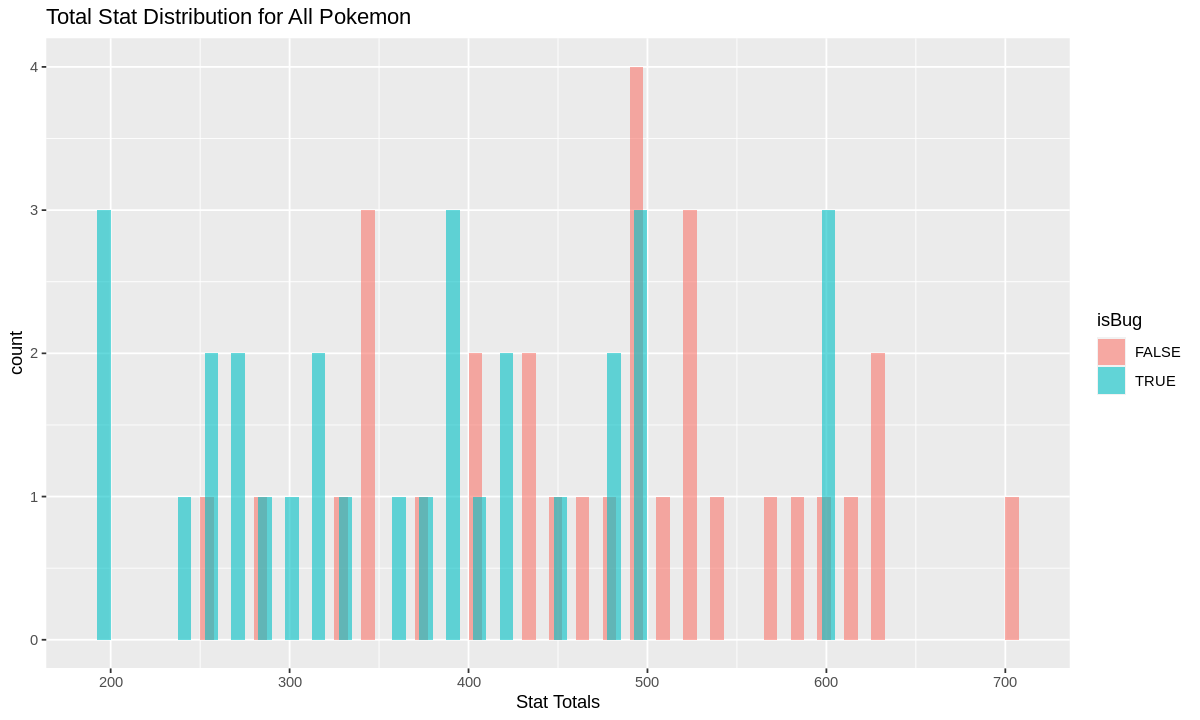

In [7]:
all_total_disp <- combined_sample |>
    ggplot(aes(x = Total, fill = isBug)) +
    geom_histogram(binwidth = 15, alpha = 0.6, position = position_dodge(width = 5 )) +
    ggtitle("Total Stat Distribution for All Pokemon") +
    xlab("Stat Totals")
all_total_disp